In [1]:
library(psych)
library(GPArotation)
dir_home <- getwd()
print(dir_home)
file_source_accel = "../../../analysis/specific/analysis_20230628_01_ACCEL_dimension_reduction/one_hot.csv"
path_out = "../../../analysis/specific/analysis_20230706_01_ACCEL_dimension_reduction/"
if(!dir.exists(path_out)){
    dir.create(path_out)
}


Attaching package: 'GPArotation'


The following objects are masked from 'package:psych':

    equamax, varimin




[1] "J:/sugai/UKBiobank/code/analysis/specific"


In [2]:
# Check basics
func_factor_analysis_1 <- function(dat_0) {
    dat <- na.omit(dat_0)
    print("Example data")
    print(head(dat, 3))

    # Overall KMO value is better be > 0.6
    print("-----------------------")
    print("KMO - better be > 0.6")
    print(KMO(dat))
}

# Draw scree plots
func_scree_plot_single <- function(dat, method, path_out) {
    par(ps=20)
    print("-----------------------")
    print(paste("Scree plot -", method))
    file_pdf <- paste(path_out, "scree_plot_", method, ".pdf", sep="")
    file_png <- paste(path_out, "scree_plot_", method, ".png", sep="")
    
    pdf(file_pdf)
    fa.parallel(dat, fm=method, fa="fa")
    abline(h=0) # y = 0
    dev.off()
    png(file_png, width = 1200, height = 1400, res=200)
    fa.parallel(dat, fm=method, fa="fa")
    abline(h=0) # y = 0
    dev.off()
}

# Scree plots
func_scree_plots <- function(dat, path_out_0, suffix) {
    path_out <- paste(path_out_0, "scree_plot_", suffix, "_", 
    format(Sys.time(), "%Y%m%d_%H%M"), "/", sep="" )
    dir.create(path_out)
    print(paste("Output to:", path_out))
    func_scree_plot_single(dat, "ml", path_out)
    func_scree_plot_single(dat, "uls", path_out)
    func_scree_plot_single(dat, "wls", path_out)
    func_scree_plot_single(dat, "gls", path_out)
    func_scree_plot_single(dat, "pa", path_out)
}

# Determine the optimal factor number
func_VSS_single <- function(dat, method){
    print("-----------------------")
    print(paste("VSS -", method)) 
    x <- suppressWarnings(VSS(dat, fm=method, plot=FALSE))
    
    n_min_MAP <- which.min(x$map)
    n_min_BIC <- which.min(x$vss.stats$BIC)
    n_min_SABIC <- which.min(x$vss.stats$SABIC)

    min_MAP <- min(x$map)
    min_BIC <- min(x$vss.stats$BIC)
    min_SABIC <- min(x$vss.stats$SABIC)

    print(paste("MAP, BIC, SABIC are minimum at factor number = ",
                n_min_MAP,
                ",", n_min_BIC,
                ",", n_min_SABIC)
         )
    print(paste("Their minimum values = ",
                min_MAP,
                ",", min_BIC,
                ",", min_SABIC)
                )
}

# VSS
func_VSS <- function(dat){
    func_VSS_single(dat, "pa")
    func_VSS_single(dat, "minres")
    func_VSS_single(dat, "mle")
}

# Practice with BFI dataset

In [3]:
data(bfi)
print("Dimension")
print(dim( bfi ))
dat_bfi <- bfi[ 1:25 ]

[1] "Dimension"
[1] 2800   28


In [29]:
# Check basics
func_factor_analysis_1(dat_bfi)

[1] "Example data"
      A1 A2 A3 A4 A5 C1 C2 C3 C4 C5 E1 E2 E3 E4 E5 N1 N2 N3 N4 N5 O1 O2 O3 O4
61617  2  4  3  4  4  2  3  3  4  4  3  3  3  4  4  3  4  2  2  3  3  6  3  4
61618  2  4  5  2  5  5  4  4  3  4  1  1  6  4  3  3  3  3  5  5  4  2  4  3
61620  5  4  5  4  4  4  5  4  2  5  2  4  4  4  5  4  5  4  2  3  4  2  5  5
      O5
61617  3
61618  3
61620  2
[1] "-----------------------"
[1] "KMO - better be > 0.6"
Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = dat)
Overall MSA =  0.85
MSA for each item = 
  A1   A2   A3   A4   A5   C1   C2   C3   C4   C5   E1   E2   E3   E4   E5   N1 
0.75 0.84 0.87 0.88 0.90 0.84 0.80 0.85 0.83 0.86 0.84 0.88 0.90 0.88 0.89 0.78 
  N2   N3   N4   N5   O1   O2   O3   O4   O5 
0.78 0.86 0.89 0.86 0.86 0.78 0.84 0.77 0.76 


In [9]:
func_scree_plots(dat_bfi, path_out, "BFI_dataset")

[1] "Output to: ../../../analysis/specific/analysis_20230706_01_ACCEL_dimension_reduction/scree_plot_BFI_dataset_20230707_1520/"
[1] "-----------------------"
[1] "Scree plot - ml"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - uls"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - wls"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - gls"
Parallel analysis suggests that the number of factors =  6  and the number of compon

png 
  2

In [30]:
# VSS
func_VSS(dat_bfi)

[1] "-----------------------"
[1] "VSS - pa"
[1] "MAP, BIC, SABIC are minimum at factor number =  5 , 8 , 8"
[1] "Their minimum values =  0.0148010290671486 , -513.168389901272 , -106.468895550644"
[1] "-----------------------"
[1] "VSS - minres"
[1] "MAP, BIC, SABIC are minimum at factor number =  5 , 8 , 8"
[1] "Their minimum values =  0.0148010290671486 , -513.094436542517 , -106.394942191888"
[1] "-----------------------"
[1] "VSS - mle"
[1] "MAP, BIC, SABIC are minimum at factor number =  5 , 8 , 8"
[1] "Their minimum values =  0.0148010290671486 , -524.264777468352 , -117.565283117723"


# ACCEL dataset

## Read data

In [3]:
setwd(dir_home)
data_accel <- read.csv(file_source_accel)
data_accel

eid,ST_long_mean,ST_long_sd,WT_long_mean,WT_long_sd,ST_short_mean,ST_short_sd,WT_short_mean,WT_short_sd,long_window_len_mean,⋯,abnormal_group_eid_old_4b.4,abnormal_group_eid_old_4b.5,abnormal_group_eid_old_4b.6,abnormal_group_eid_old_NA,group_five_1,group_five_2,group_five_3,group_five_4,group_five_5,group_five_NA
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000076,408.0833,83.08450,53.91667,22.498920,34.666668,55.541775,2.8333333,4.624812,462.0000,⋯,0,0,0,1,0,0,0,1,0,0
1000091,215.3333,98.56625,23.00000,14.309088,73.333336,83.993385,22.9166660,27.380676,286.0000,⋯,0,0,0,1,0,0,1,0,0,0
1000162,512.3750,45.02274,110.62500,56.505947,39.125000,38.664220,18.7500000,21.185196,623.0000,⋯,0,0,0,1,0,0,0,1,0,0
1000171,461.3000,56.67504,64.60000,33.898968,4.000000,8.000000,0.8000000,1.600000,525.9000,⋯,0,0,0,1,0,0,0,1,0,0
1000196,425.7500,47.03257,27.91667,7.683406,24.500000,32.601124,10.6666670,12.171232,453.6667,⋯,0,0,0,1,0,0,0,1,0,0
1000209,412.1000,99.94719,43.40000,6.952697,16.500000,27.828043,14.0000000,26.284977,455.5000,⋯,0,0,0,1,0,0,0,1,0,0
1000235,449.2500,14.08235,50.75000,22.071380,7.500000,9.345230,7.1666665,5.763872,500.0000,⋯,0,0,0,1,0,0,0,1,0,0
1000254,239.9167,125.89726,68.50000,41.241160,80.500000,97.910675,21.8333340,19.766695,370.1000,⋯,0,0,0,1,0,0,1,0,0,0
1000260,327.1667,43.71372,21.58333,13.507457,15.416667,15.360709,0.9166667,1.096079,348.7500,⋯,0,0,0,1,0,0,0,1,0,0


In [4]:
col_sleep_indexes <- c(
'ST_long_mean', 'ST_long_sd', 'WT_long_mean', 'WT_long_sd', 
'ST_short_mean', 'ST_short_sd', 'WT_short_mean', 'WT_short_sd',
'long_window_len_mean', 'long_window_len_sd', 'long_window_num_mean', 'long_window_num_sd',
'short_window_len_mean', 'short_window_len_sd', 'short_window_num_mean', 'short_window_num_sd',
'phase_mean', 'phase_sd', 'max_period', 'amplitude', 'sleep_percentage')

col_sleep_indexes_plus_agesex <- c(
'ST_long_mean', 'ST_long_sd', 'WT_long_mean', 'WT_long_sd', 
'ST_short_mean', 'ST_short_sd', 'WT_short_mean', 'WT_short_sd',
'long_window_len_mean', 'long_window_len_sd', 'long_window_num_mean', 'long_window_num_sd',
'short_window_len_mean', 'short_window_len_sd', 'short_window_num_mean', 'short_window_num_sd',
'phase_mean', 'phase_sd', 'max_period', 'amplitude', 'sleep_percentage', 'age', 'sex')

data_accel_sleep_indexes <- data_accel[col_sleep_indexes]
data_accel_sleep_indexes_plus_agesex <- data_accel[col_sleep_indexes_plus_agesex]

## Some statistics
- Factor number: somewhere around 4-8
- Best method: Minimum likelyhood

In [13]:
# Check basics
func_factor_analysis_1(data_accel_sleep_indexes)

[1] "Example data"
  ST_long_mean ST_long_sd WT_long_mean WT_long_sd ST_short_mean ST_short_sd
1     408.0833   83.08450     53.91667   22.49892      34.66667    55.54178
2     215.3333   98.56625     23.00000   14.30909      73.33334    83.99339
3     512.3750   45.02274    110.62500   56.50595      39.12500    38.66422
  WT_short_mean WT_short_sd long_window_len_mean long_window_len_sd
1      2.833333    4.624812                  462           93.65184
2     22.916666   27.380676                  286           29.75903
3     18.750000   21.185196                  623           99.46042
  long_window_num_mean long_window_num_sd short_window_len_mean
1            1.0000000           0.000000              56.25000
2            0.8333333           0.372678              36.09375
3            1.0000000           0.000000              46.30000
  short_window_len_sd short_window_num_mean short_window_num_sd phase_mean
1            49.82030             0.6666667            0.745356   960.7500

In [14]:
func_factor_analysis_1(data_accel_sleep_indexes_plus_agesex)

[1] "Example data"
  ST_long_mean ST_long_sd WT_long_mean WT_long_sd ST_short_mean ST_short_sd
1     408.0833   83.08450     53.91667   22.49892      34.66667    55.54178
2     215.3333   98.56625     23.00000   14.30909      73.33334    83.99339
3     512.3750   45.02274    110.62500   56.50595      39.12500    38.66422
  WT_short_mean WT_short_sd long_window_len_mean long_window_len_sd
1      2.833333    4.624812                  462           93.65184
2     22.916666   27.380676                  286           29.75903
3     18.750000   21.185196                  623           99.46042
  long_window_num_mean long_window_num_sd short_window_len_mean
1            1.0000000           0.000000              56.25000
2            0.8333333           0.372678              36.09375
3            1.0000000           0.000000              46.30000
  short_window_len_sd short_window_num_mean short_window_num_sd phase_mean
1            49.82030             0.6666667            0.745356   960.7500

**ATTENTION**

The optimal number of factors differs depending on the method! (see `Parallel analysis suggests that the number of factors = `)

In [21]:
# Scree plots
func_scree_plots(data_accel_sleep_indexes, path_out, "ACCEL_indexes_only")

[1] "Output to: ../../../analysis/specific/analysis_20230706_01_ACCEL_dimension_reduction/scree_plot_ACCEL_indexes_only_20230707_1602/"
[1] "-----------------------"
[1] "Scree plot - ml"
Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  7  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - uls"


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - wls"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - gls"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - pa"


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


png 
  2

In [16]:
func_scree_plots(data_accel_sleep_indexes_plus_agesex, path_out, "ACCEL_indexes_plus_agesex");

[1] "Output to: ../../../analysis/specific/analysis_20230706_01_ACCEL_dimension_reduction/scree_plot_ACCEL_indexes_plus_agesex_20230707_1531/"
[1] "-----------------------"
[1] "Scree plot - ml"
Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - uls"


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - wls"


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - gls"
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
Parallel analysis suggests that the number of factors =  6  and the number of components =  NA 
[1] "-----------------------"
[1] "Scree plot - pa"


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  8  and the number of components =  NA 


png 
  2

In [26]:
# VSS
func_VSS(data_accel_sleep_indexes)

[1] "-----------------------"
[1] "VSS - pa"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.056525260951499 , 136889.021007767 , 137111.483249923"
[1] "-----------------------"
[1] "VSS - minres"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.056525260951499 , 173819.565705183 , 174042.027947339"
[1] "-----------------------"
[1] "VSS - mle"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.056525260951499 , 109917.97824301 , 110140.440485166"


In [27]:
func_VSS(data_accel_sleep_indexes_plus_agesex)

[1] "-----------------------"
[1] "VSS - pa"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.0462670568360114 , 156110.813971788 , 156419.083078775"
[1] "-----------------------"
[1] "VSS - minres"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.0462670568360114 , 378766.106404815 , 379074.375511802"
[1] "-----------------------"
[1] "VSS - mle"
[1] "MAP, BIC, SABIC are minimum at factor number =  4 , 8 , 8"
[1] "Their minimum values =  0.0462670568360114 , 115745.988443671 , 116054.257550658"


## More search
- Fix to Minimum Likelyhood method
- Change rotation methods

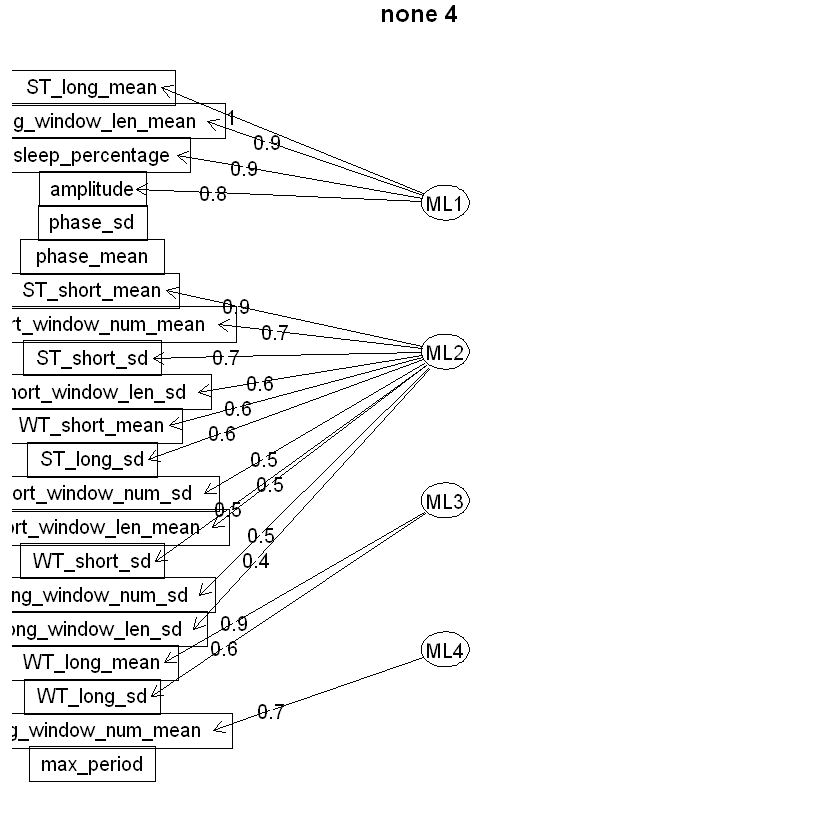

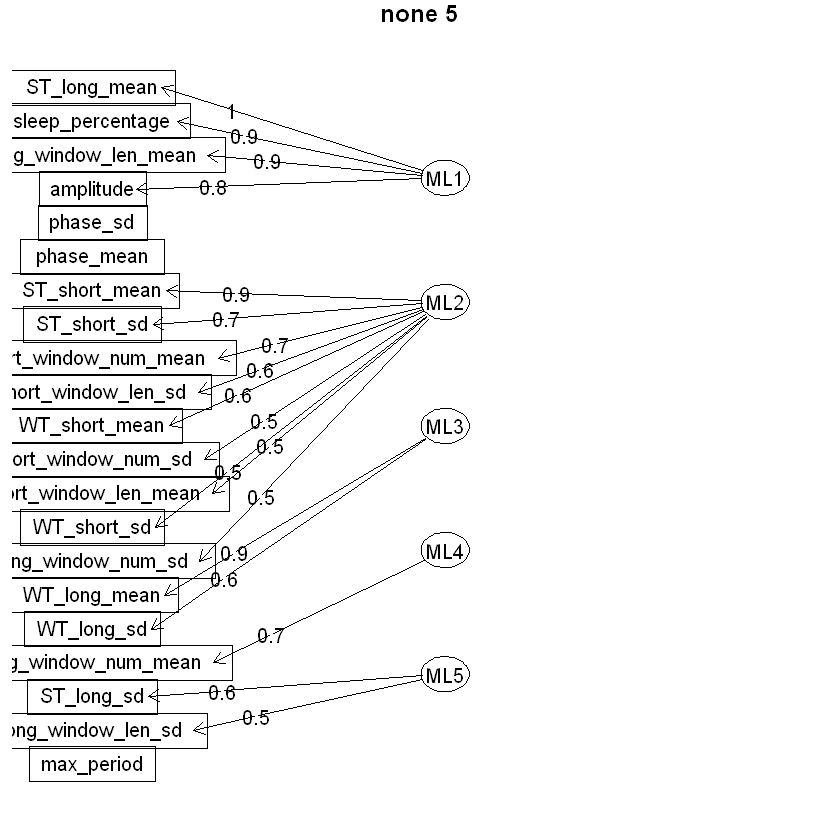

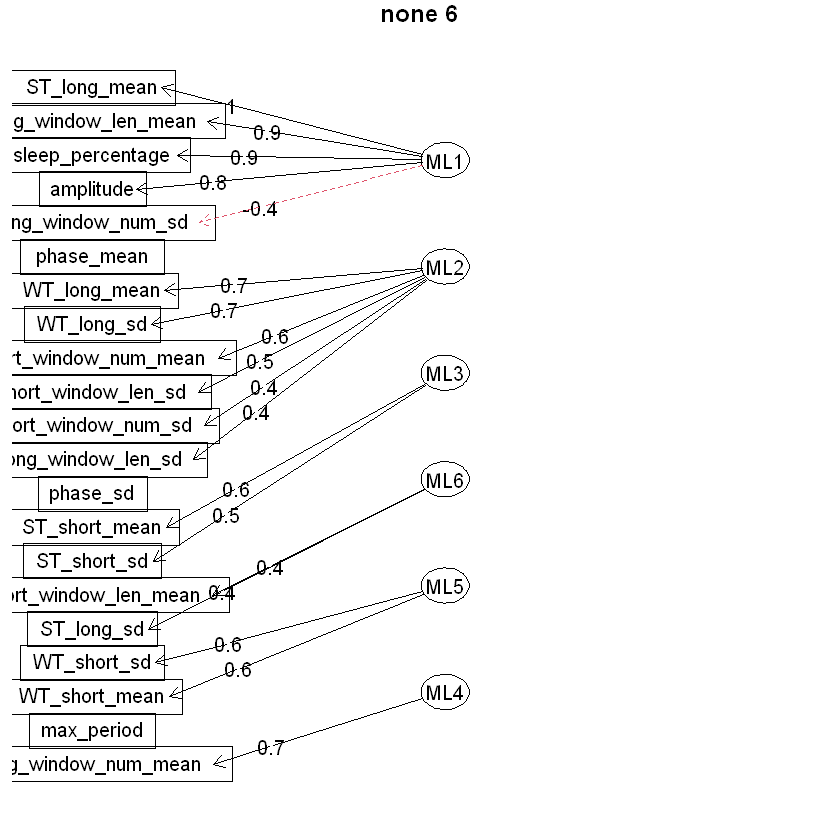

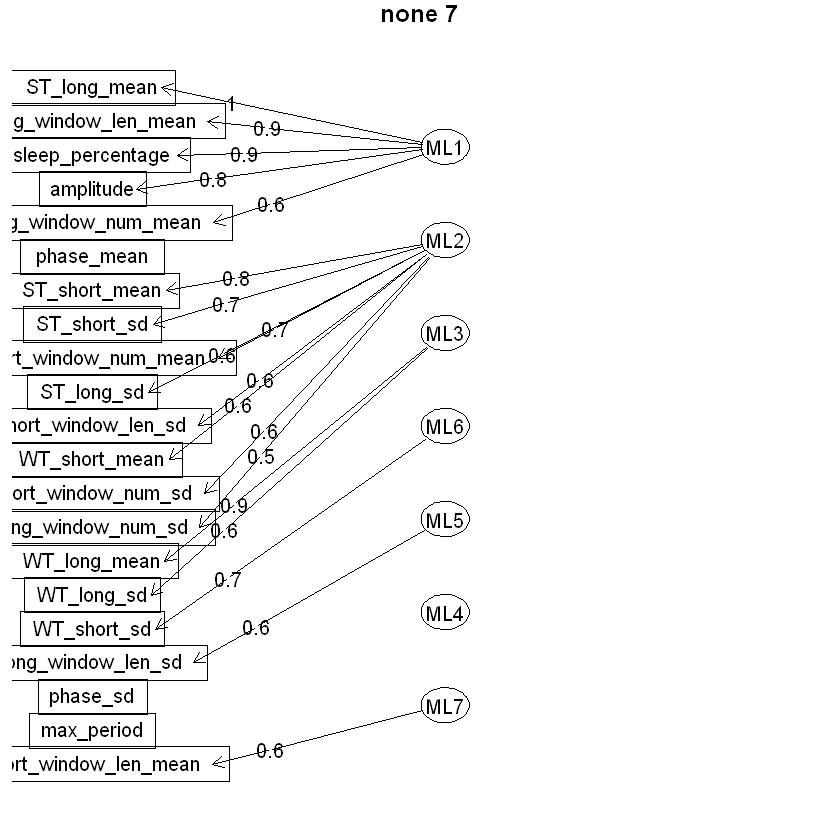

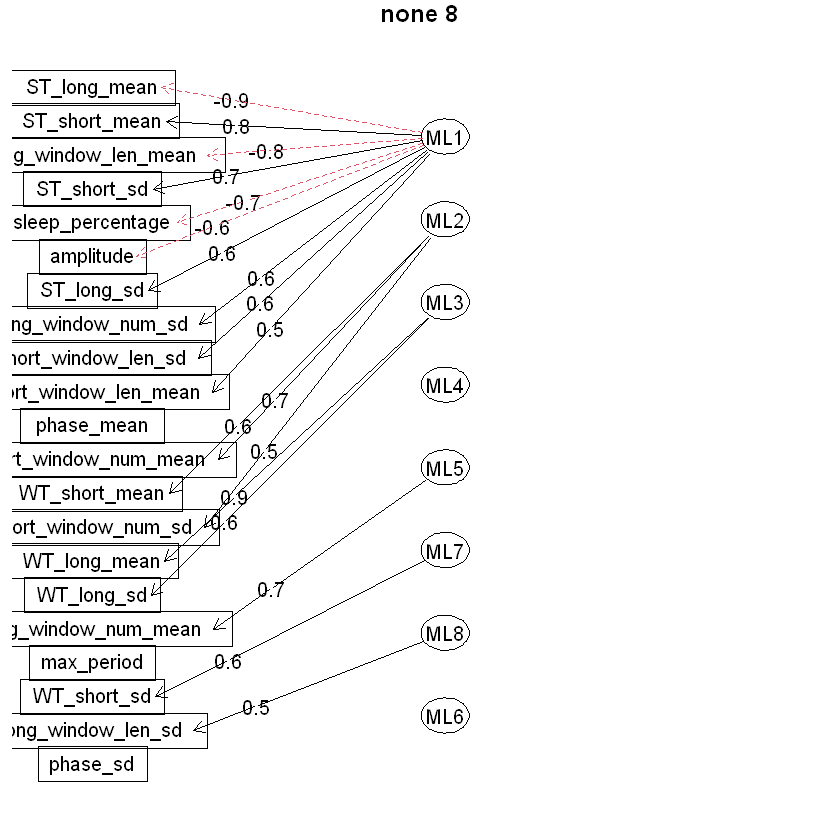

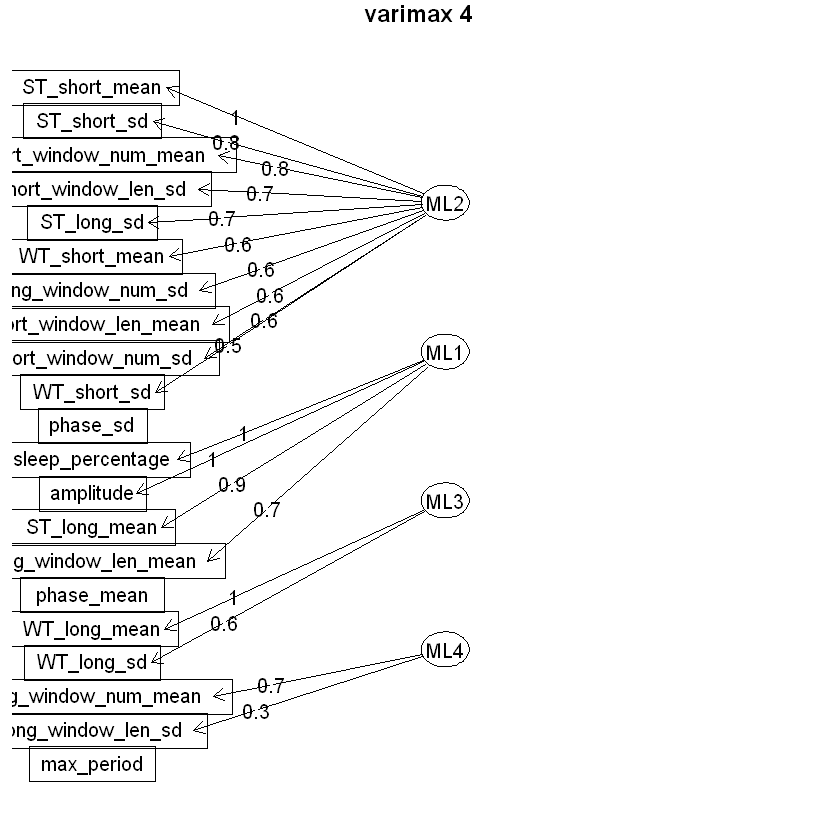

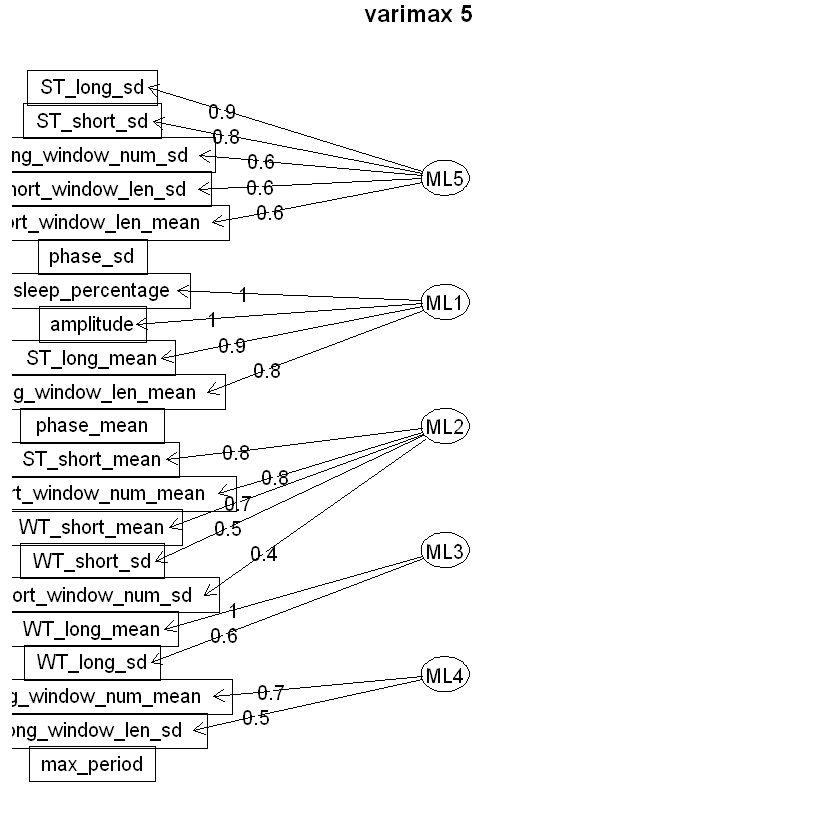

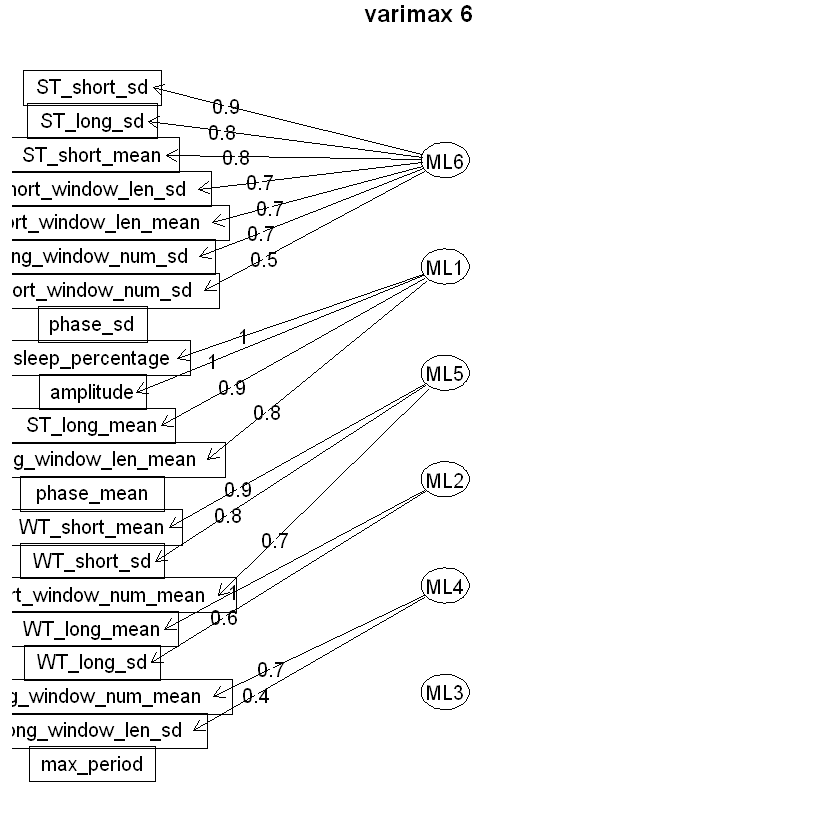

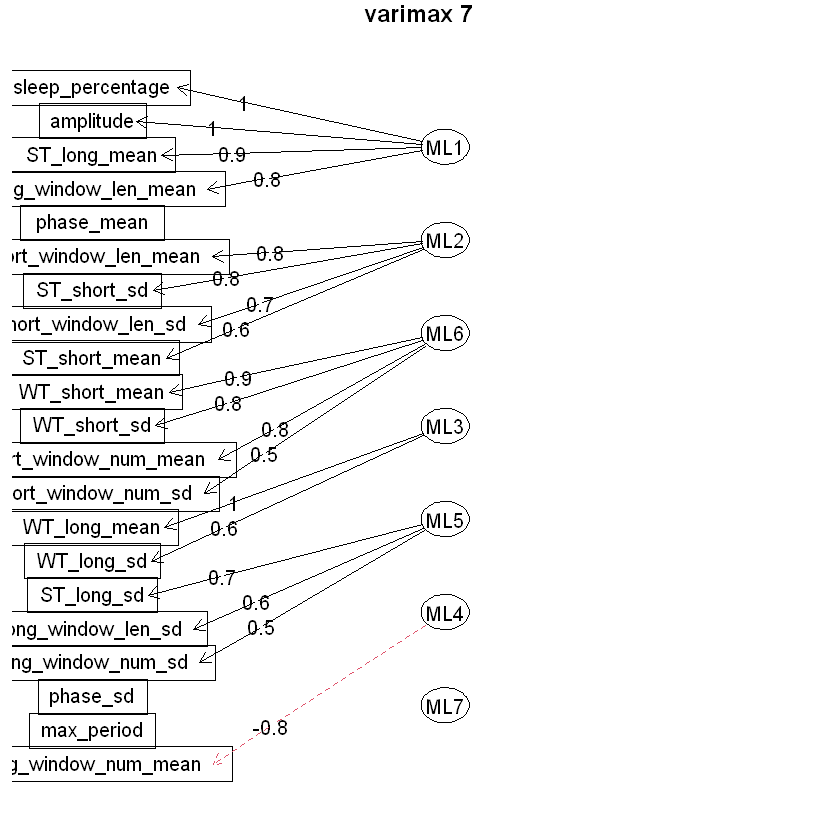

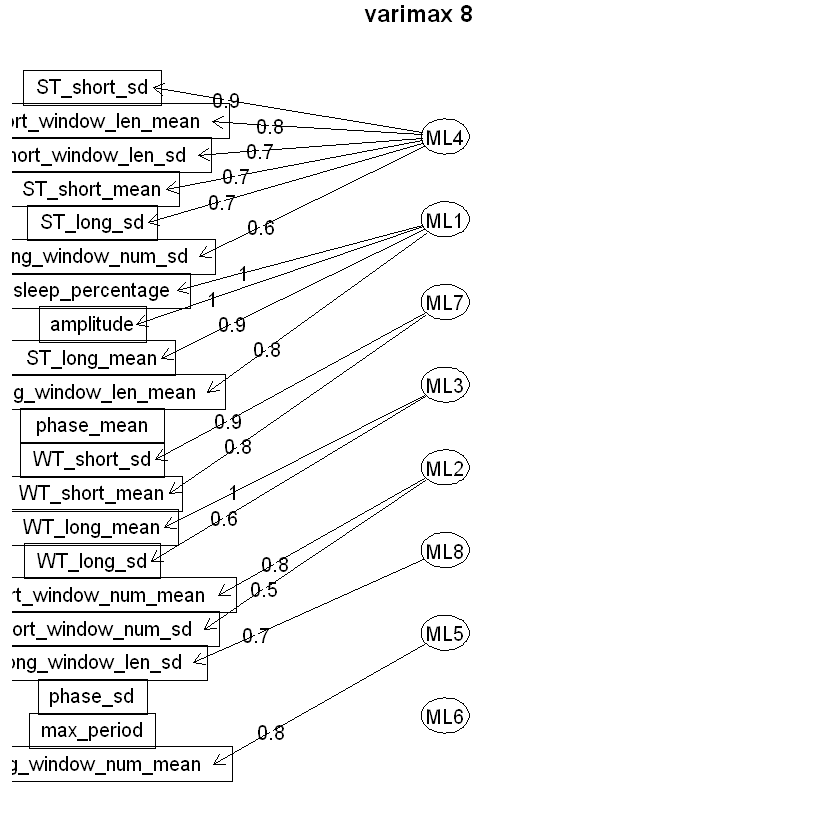

In [8]:
rotate_list <- c("none", "varimax")

# rotate_list <- c("none", "varimax", "quartimax", "bentlerT", 
# "equamax", "varimin", "geominT", "bifactor")

for(rotate_method in rotate_list) {
    for (n in 4:8) {
        result <- fa(data_accel_sleep_indexes, nfactors=n, fm="ml", rotate=rotate_method)
        title <- paste(rotate_method, n)
        fa.diagram(result, main=title)
    }
}

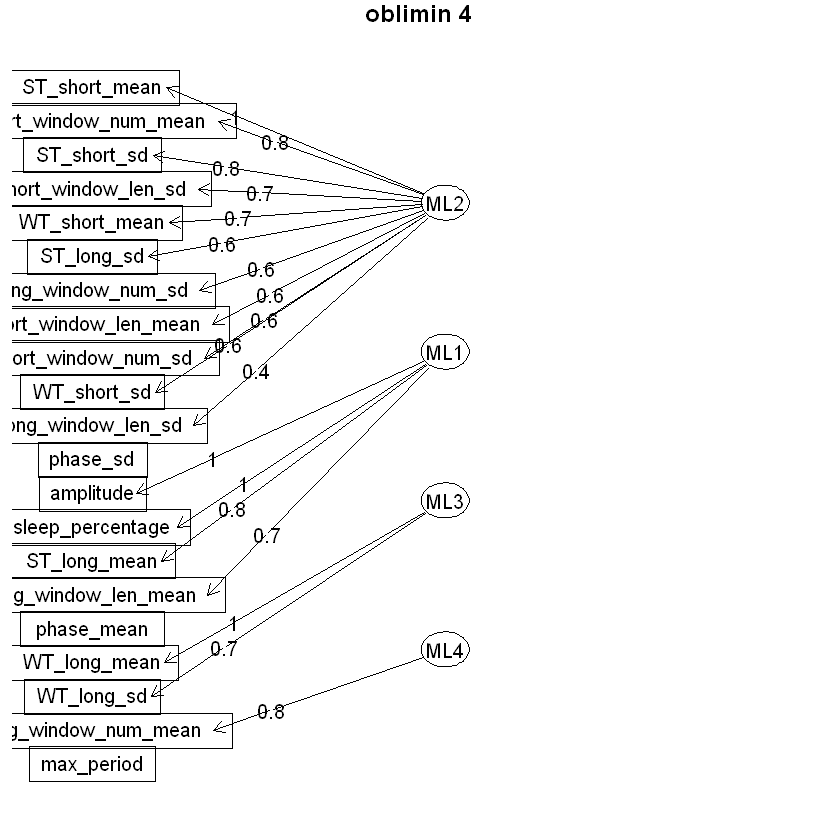

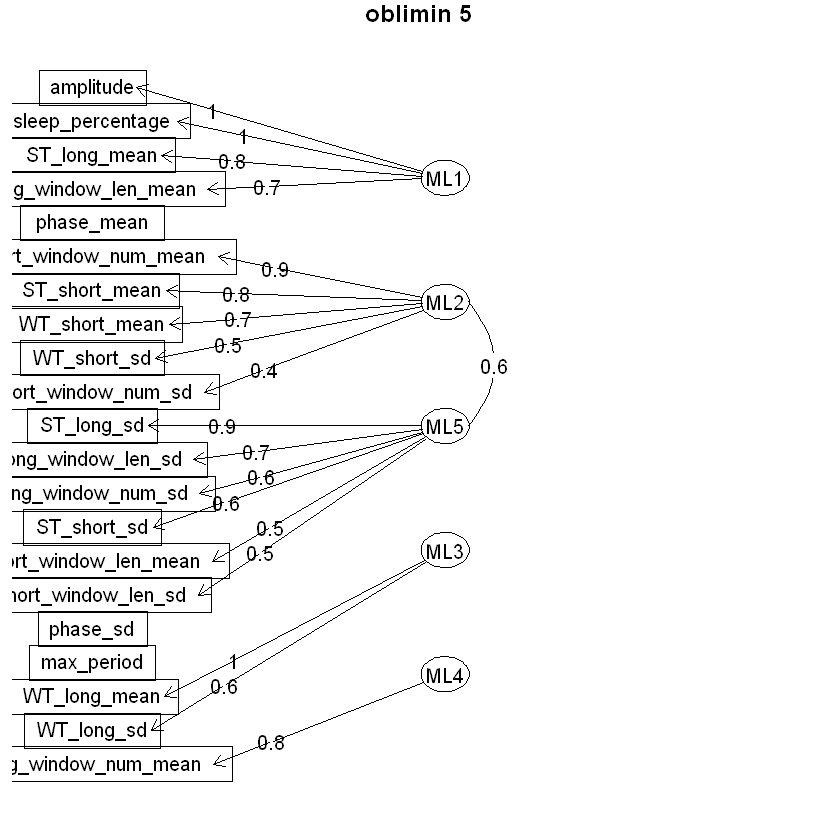

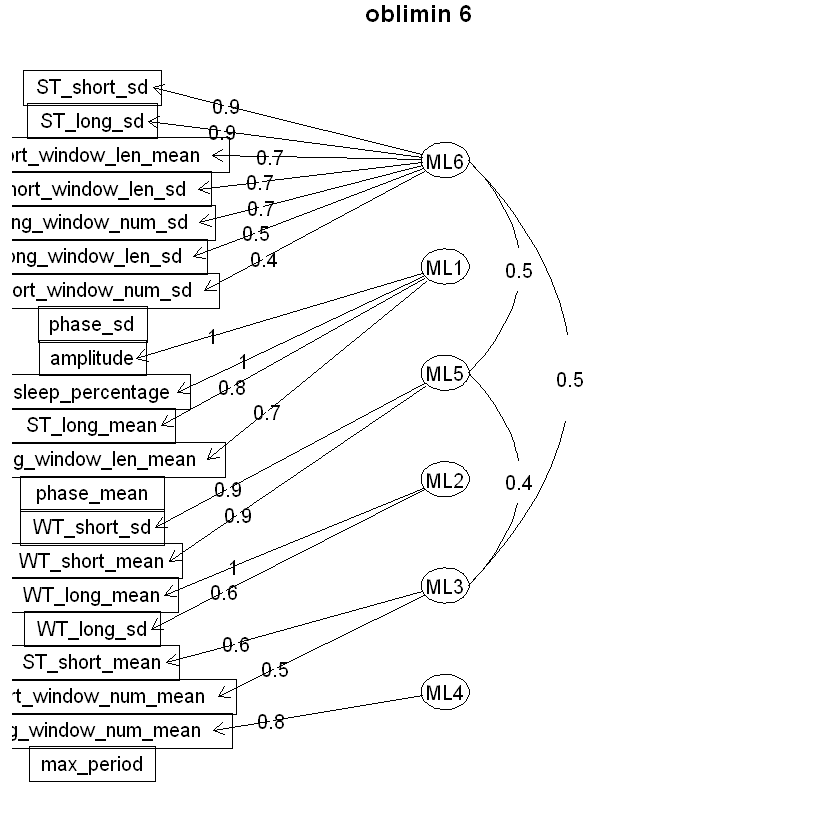

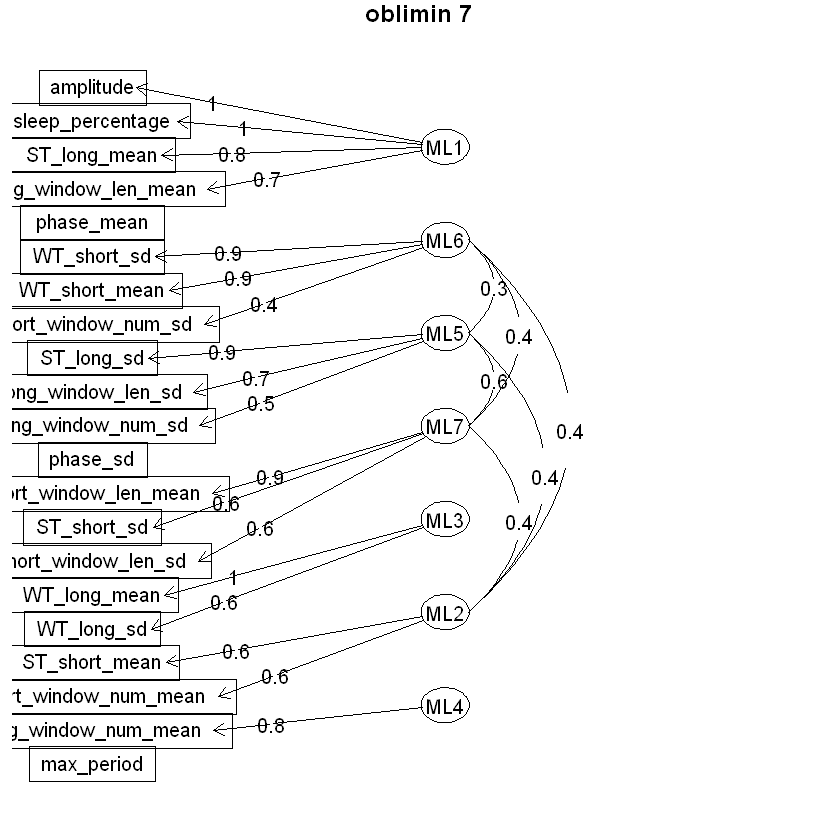

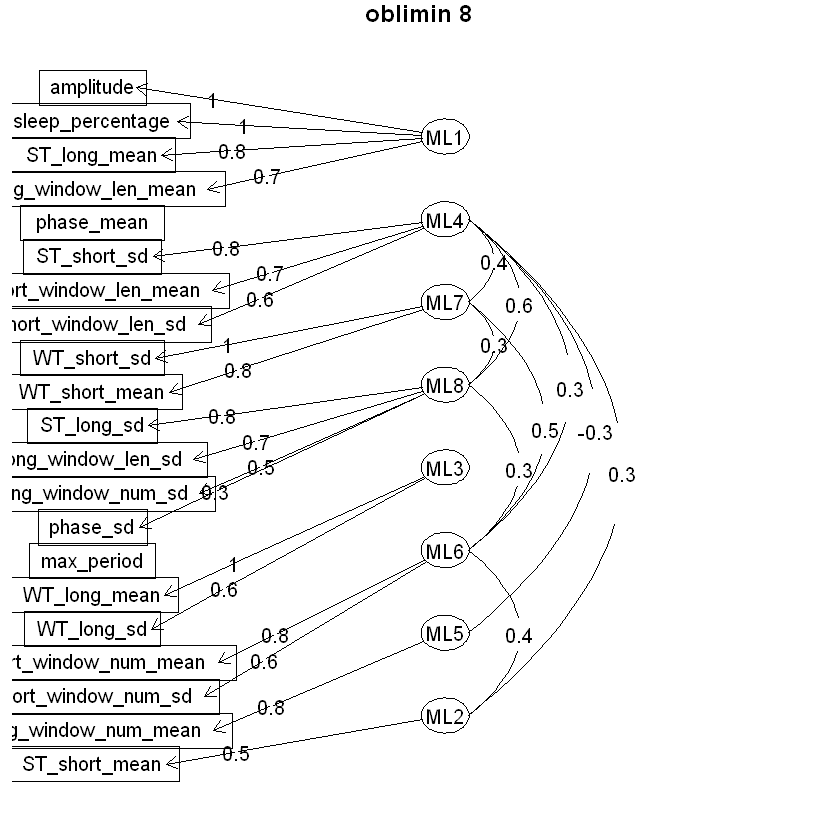

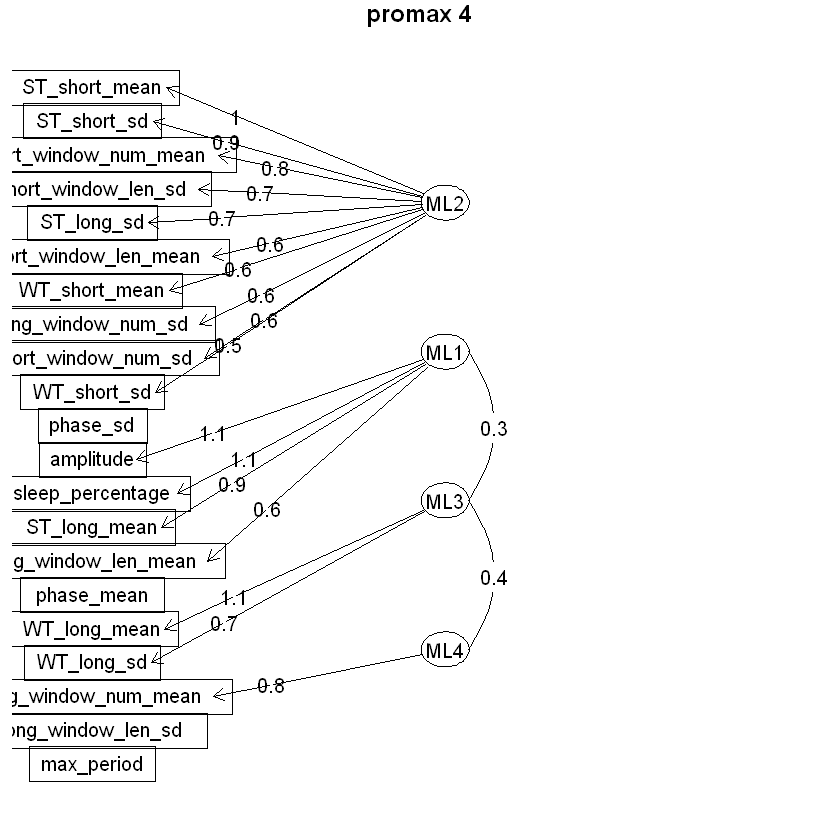

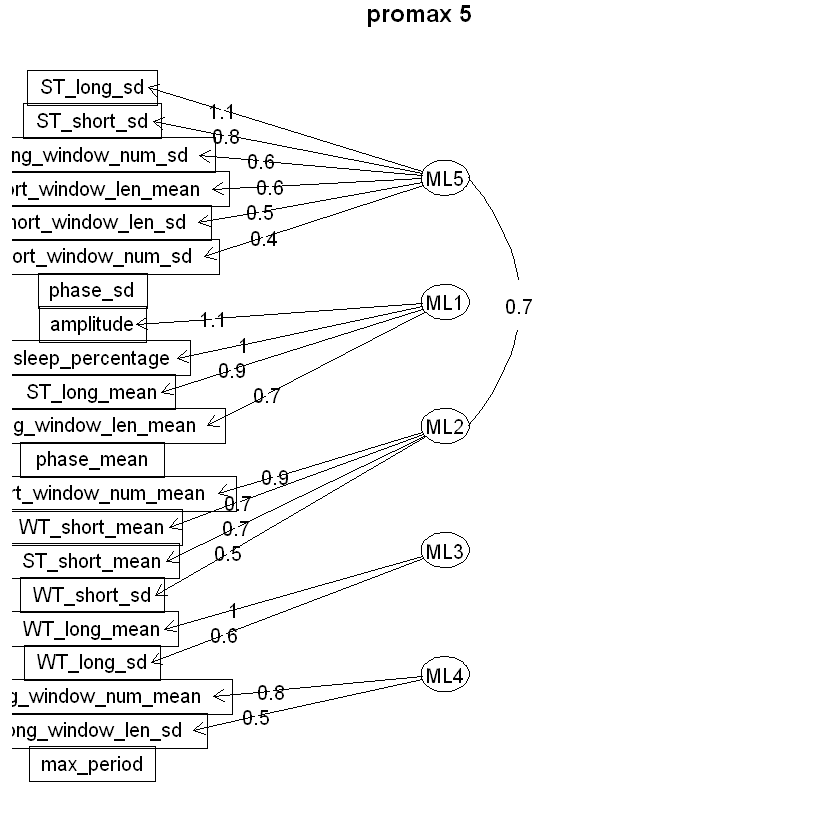

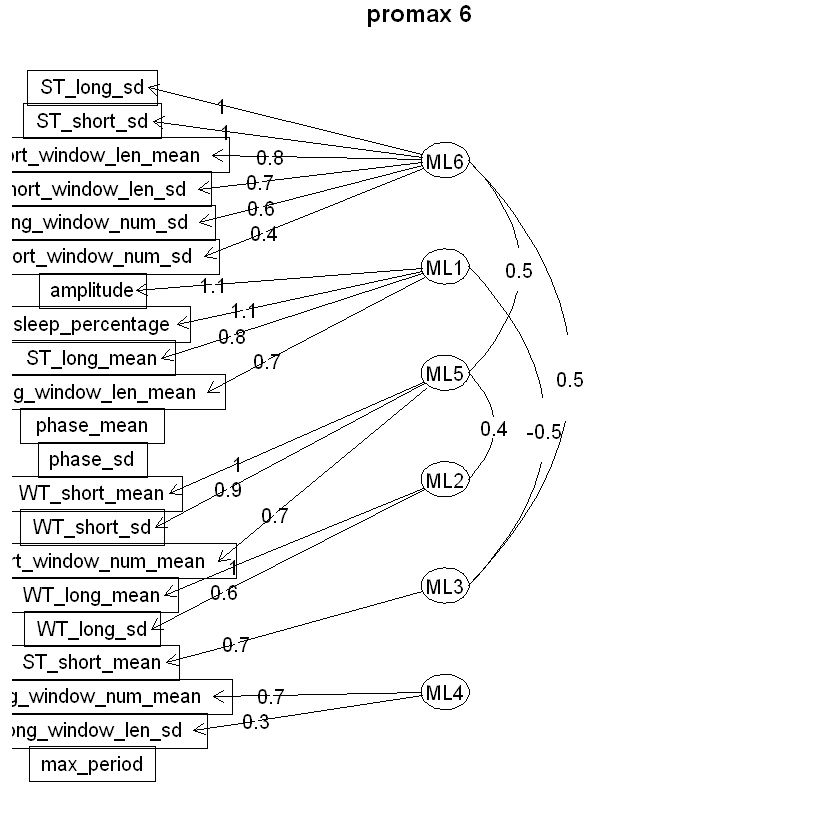

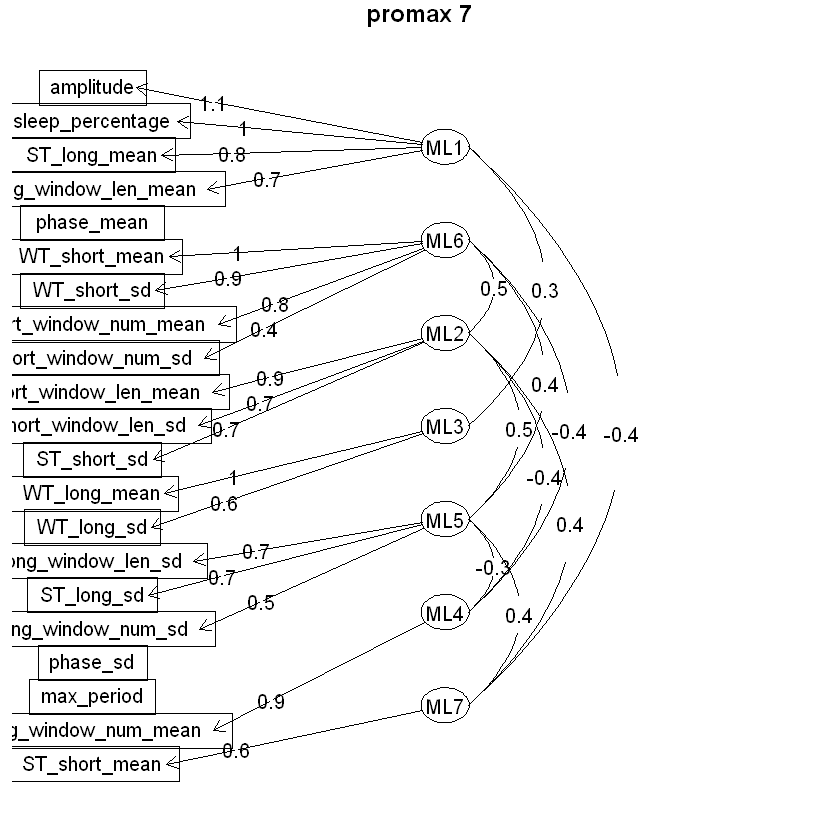

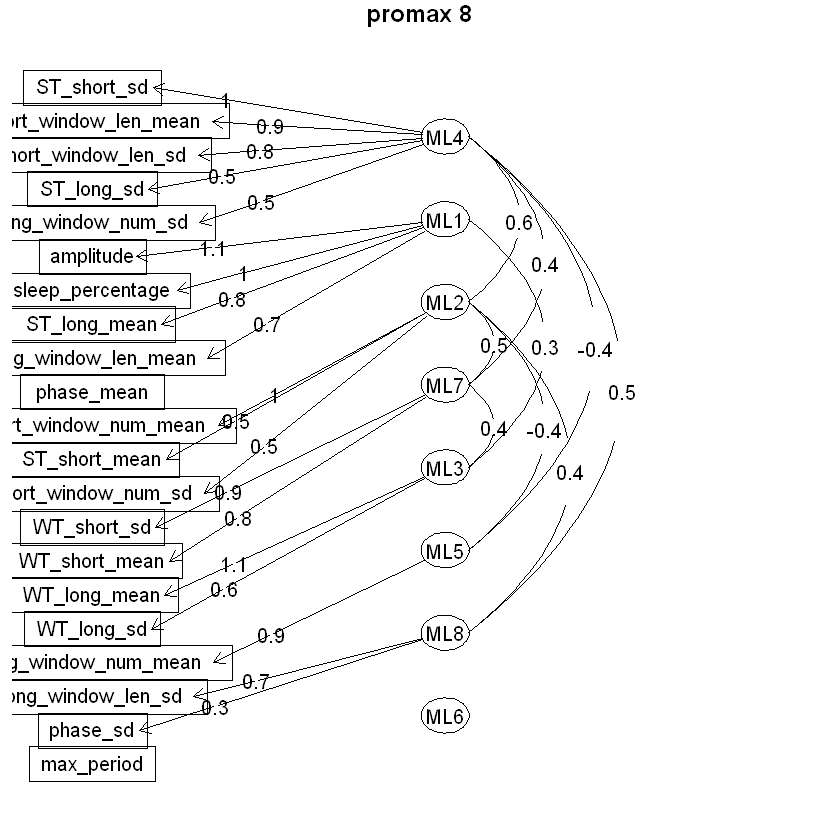

In [9]:
rotate_list <- c("oblimin", "promax")

for(rotate_method in rotate_list) {
    for (n in 4:8) {
        result <- fa(data_accel_sleep_indexes, nfactors=n, fm="ml", rotate=rotate_method)
        title <- paste(rotate_method, n)
        fa.diagram(result, main=title)
    }
}

## Fix conditions and export
- fm="ml"
- rotate="none", "varimax", "promax", "oblimin"

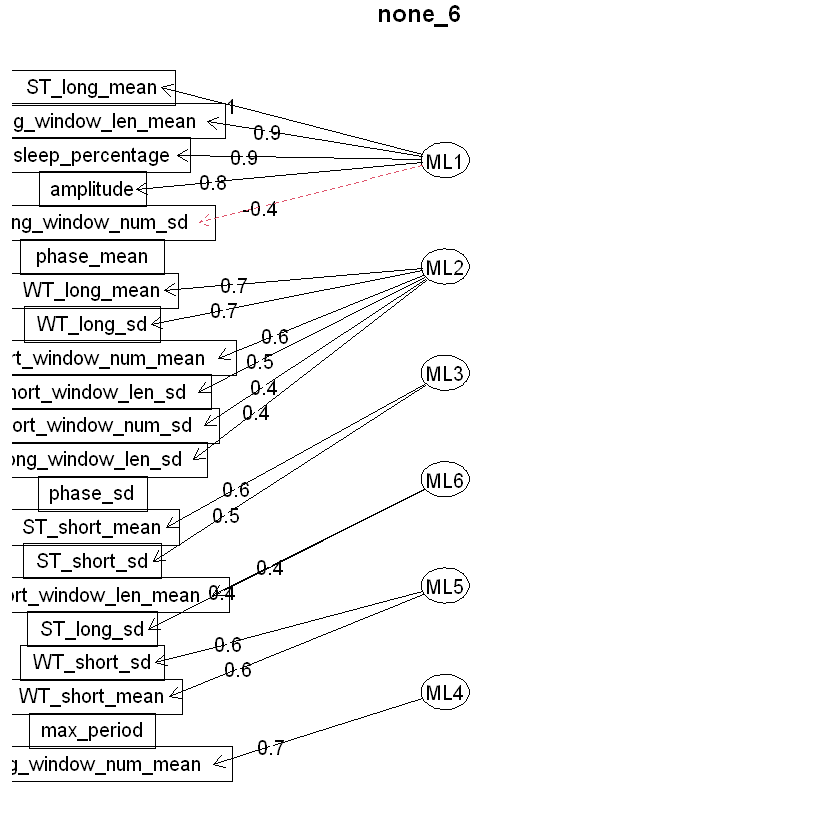

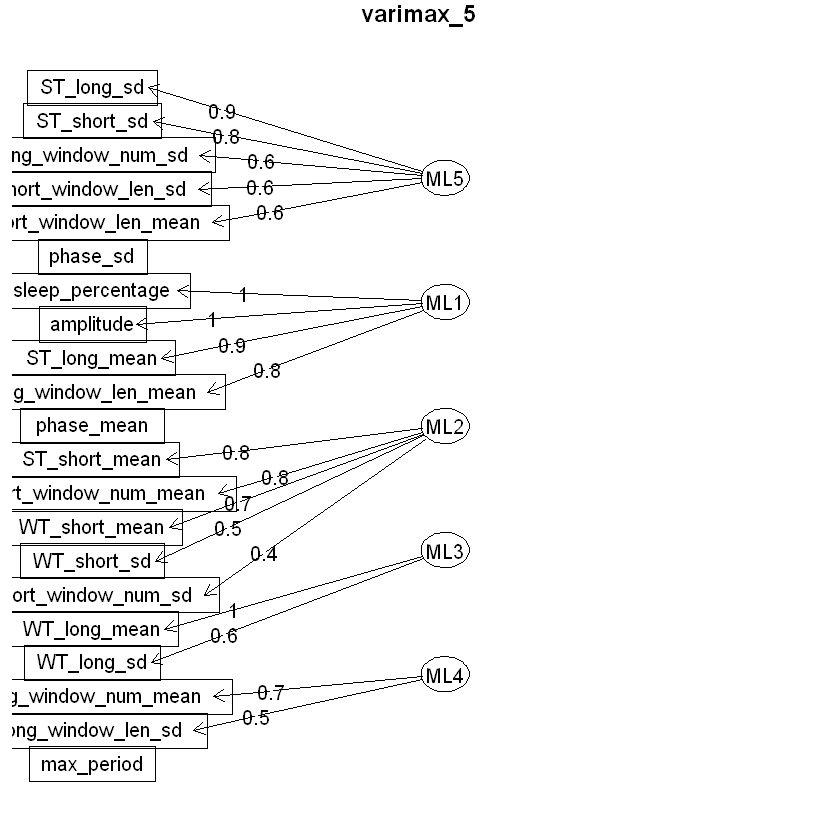

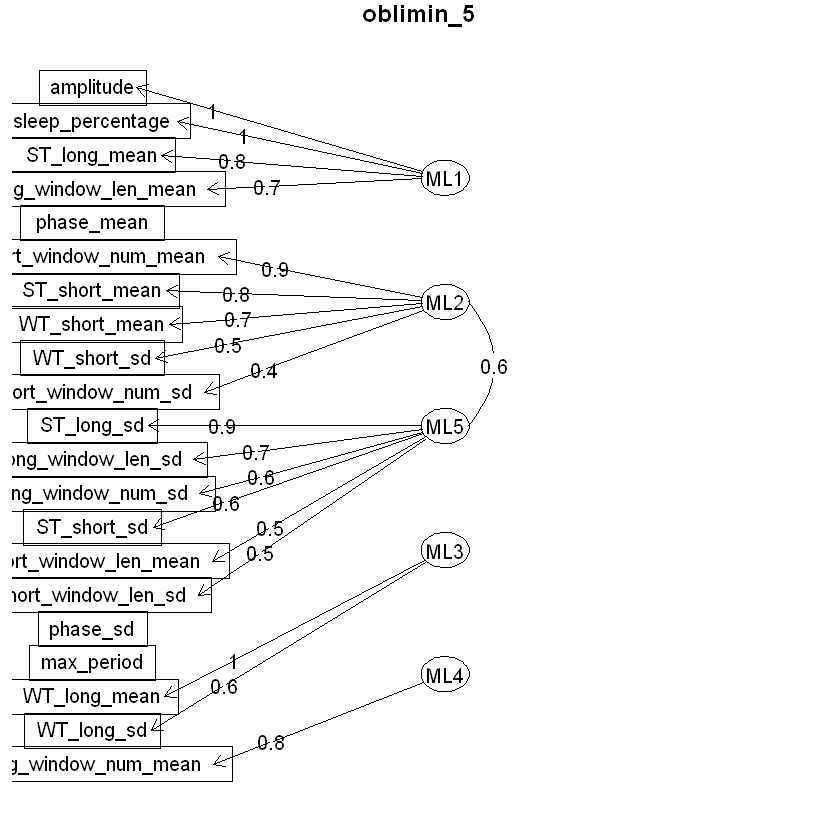

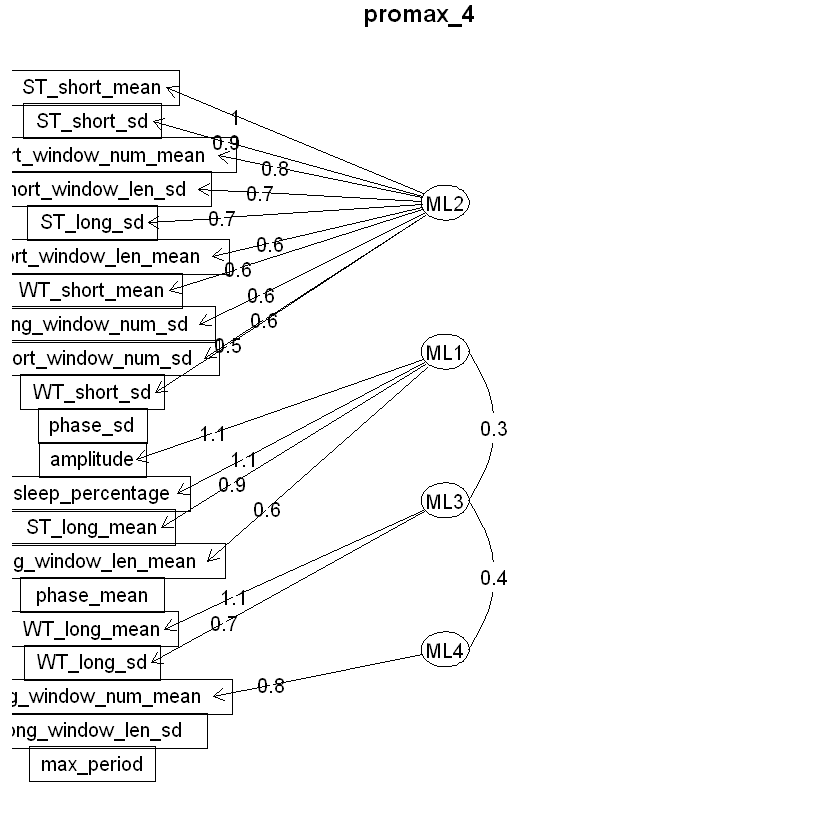

In [38]:
# Load ACCEL ID list for joining
setwd(dir_home)
file_accel_id <- "../../../data/ukbb/4047708_673112_all/accel_ukbb/for_plink/ACCEL_id.txt"
accel_id <- as.matrix(read.table(file_accel_id))
# Add headers
colnames(accel_id) <- c("FID", "IID")

methods_list <- list(
    list("none", 6),
    list("varimax", 5), 
    list("oblimin", 5), 
    list("promax", 4)
)

path_out_single <- paste(path_out, "factor_analysis_", 
    format(Sys.time(), "%Y%m%d_%H%M"), "/", sep="")
dir.create(path_out_single)

for (methods in methods_list){
    rotate_method <- methods[[1]]
    n <- methods[[2]]
    
    # Calculate
    result <- fa(data_accel_sleep_indexes, nfactors=n, fm="ml", rotate=rotate_method)

    # Export
    title <- paste(rotate_method, n, sep="_")
    file_name_main <- paste(path_out_single, title, sep="")    
    file_rds <- paste(file_name_main, ".rds", sep="")
    file_txt <- paste(file_name_main, ".txt", sep="")
    file_pdf <- paste(file_name_main, ".pdf", sep="")
    file_png <- paste(file_name_main, ".png", sep="")
    file_csv <- paste(file_name_main, ".csv", sep="")
    file_plink <- paste(file_name_main, "_for_plink.txt", sep="")

    # Save the regression result
    saveRDS(result, file=file_rds)
    save(result, file=file_txt, ascii=TRUE)
    
    # Save as pdf/png
    pdf(file_pdf)
    fa.diagram(result, main=title)
    dev.off()
    png(file_png, width = 1200, height = 1400, res=200)
    fa.diagram(result, main=title)
    dev.off()
    
    # Draw
    fa.diagram(result, main=title)
    
    # Save the model fitting result
    converted_data <- predict(result, data = data_accel_sleep_indexes)
    write.csv(converted_data, file=file_csv, row.names=FALSE)
    
    # For PLINK input
    joined_data <- cbind(accel_id, converted_data)
    write.table(joined_data, file=file_plink, row.names=FALSE, quote=FALSE, sep='\t')
}